# APPLICATION OF MACHINE LEARNING FOR DNS TUNNELING DETECTION

## What is DNS?

- The Domain Name System (DNS), 
- resolve human readable hostnames into machine readable IP Addresses,
- When you visit a domain such as “Flipkart.com”, your computer follows a series of steps to turn the human readable web address into a machine readable IP address 143.22.32.11

## DNS TUNNELING

DNS tunnelling is a method used by malicious users who intend to bypass the security gateway to send or receive commands and data. This has a significant impact on revealing or releasing classified information. Taking advantage of the machine learning techniques capabilities, this research aims to adopt a binary classification in order to handle the problem of classifying DNS tunnel which will identify whether the DNS request is either legitimate or tunnelling

### 1. Load the necessary packages

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import joblib
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)
from pycaret.classification import *

### 2. Exploring the tunneling dataset

In [7]:
df=pd.read_csv("Tunnelling_data.txt",delim_whitespace=True,on_bad_lines='skip',header=None)

In [8]:
df=df.drop(3,axis=1)

In [9]:
df=df.rename(columns={0:"Timestamp",1:"Protocol",2:"Source_IP",4:"Destination_IP",5:"Identification_no",6:"DNS_type",7:"DNS_info",8:"DNS_Response_Len"})

In [10]:
df.insert(8,"Lable","Tunnel",True)

In [11]:
df.DNS_type.unique()

array(['CNAME?', 'CNAME', 'PTR?', 'NXDomain', 'TXT?', 'TXT', 'PTR', 'MX?',
       'A?', 'AAAA?', nan], dtype=object)

In [12]:
df.DNS_info.unique()

array(['dnscat.60d201f876f3ac26f0d131003afbac0ee3.',
       'dnscat.acb201f876cc2d09230bd1ffff199bc5d2.',
       '13.3.168.192.in-addr.arpa.', ...,
       'f76901caff46d4a045bb900120859005b2.chalu.com.',
       'f56501caffb73919a61c30ffffd1f93552',
       'f93101caff39da0f3fe40601192ea2a545.chalu.com.'], dtype=object)

In [13]:
df.Lable.unique()

array(['Tunnel'], dtype=object)

In [14]:
df.DNS_Response_Len.unique()

array(['(59)', '(114)', '(43)', '(44)', '(106)', '(38)', '(62)', '(47)',
       '(307)', '(310)', nan, '(152)', '(142)', '(297)', '(238)', '(109)',
       '(120)', '(271)', '(255)', '(313)', '(215)', '(273)', '(78)',
       '(264)', '(125)', '(144)', '(32)'], dtype=object)

In [15]:
df

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,18:58:15.801177,IP,192.168.3.136.51531,192.168.3.13.domain:,45828+,CNAME?,dnscat.60d201f876f3ac26f0d131003afbac0ee3.,(59),Tunnel
1,18:58:15.802048,IP,192.168.3.13.domain,192.168.3.136.51531:,45828,CNAME,dnscat.acb201f876cc2d09230bd1ffff199bc5d2.,(114),Tunnel
2,18:58:16.197885,IP,192.168.3.13.39576,dns.google.domain:,21832+,PTR?,13.3.168.192.in-addr.arpa.,(43),Tunnel
3,18:58:16.210500,IP,dns.google.domain,192.168.3.13.39576:,21832,NXDomain,0/0/0,(43),Tunnel
4,18:58:16.210722,IP,192.168.3.13.34517,dns.google.domain:,37842+,PTR?,136.3.168.192.in-addr.arpa.,(44),Tunnel
...,...,...,...,...,...,...,...,...,...
12060,19:24:19.917524,IP,192.168.3.136.55198,192.168.3.13.domain:,1576+,TXT?,fb2f01caff1cd77d86273d011fa86acf54.chalu.com.,(62),Tunnel
12061,19:24:19.918503,IP,192.168.3.13.domain,192.168.3.136.55198:,1576,TXT,9aeb01caffc7b2bf4641b8ffffd1f93552,(109),Tunnel
12062,19:24:20.922298,IP,192.168.3.136.55198,192.168.3.13.domain:,24481+,MX?,f76901caff46d4a045bb900120859005b2.chalu.com.,(62),Tunnel
12063,19:24:12.883130,IP,192.168.3.13.domain,192.168.3.136.55198:,41349,TXT,f56501caffb73919a61c30ffffd1f93552,(109),Tunnel


### 3. Data preparation

In [16]:
df[df.isnull().any(axis=1)]

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
9613,"'A?',","'AAAA?',","'MX'],",10,(309),NaN,NaN,NaN,Tunnel


In [17]:
df=df.drop(9613)

In [18]:
df

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,18:58:15.801177,IP,192.168.3.136.51531,192.168.3.13.domain:,45828+,CNAME?,dnscat.60d201f876f3ac26f0d131003afbac0ee3.,(59),Tunnel
1,18:58:15.802048,IP,192.168.3.13.domain,192.168.3.136.51531:,45828,CNAME,dnscat.acb201f876cc2d09230bd1ffff199bc5d2.,(114),Tunnel
2,18:58:16.197885,IP,192.168.3.13.39576,dns.google.domain:,21832+,PTR?,13.3.168.192.in-addr.arpa.,(43),Tunnel
3,18:58:16.210500,IP,dns.google.domain,192.168.3.13.39576:,21832,NXDomain,0/0/0,(43),Tunnel
4,18:58:16.210722,IP,192.168.3.13.34517,dns.google.domain:,37842+,PTR?,136.3.168.192.in-addr.arpa.,(44),Tunnel
...,...,...,...,...,...,...,...,...,...
12060,19:24:19.917524,IP,192.168.3.136.55198,192.168.3.13.domain:,1576+,TXT?,fb2f01caff1cd77d86273d011fa86acf54.chalu.com.,(62),Tunnel
12061,19:24:19.918503,IP,192.168.3.13.domain,192.168.3.136.55198:,1576,TXT,9aeb01caffc7b2bf4641b8ffffd1f93552,(109),Tunnel
12062,19:24:20.922298,IP,192.168.3.136.55198,192.168.3.13.domain:,24481+,MX?,f76901caff46d4a045bb900120859005b2.chalu.com.,(62),Tunnel
12063,19:24:12.883130,IP,192.168.3.13.domain,192.168.3.136.55198:,41349,TXT,f56501caffb73919a61c30ffffd1f93552,(109),Tunnel


In [19]:
df[df.isnull().any(axis=1)]

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable


In [20]:
df['DNS_Response_Len'] = df['DNS_Response_Len'].str.extract(r'\((\d+)\)').astype(int)

In [21]:
values_to_drop = ['NXDomain']
df = df[~df['DNS_type'].isin(values_to_drop)]

In [22]:
for i  in df.columns:
    print(i,df[i].unique())
    print("")

Timestamp ['18:58:15.801177' '18:58:15.802048' '18:58:16.197885' ...
 '19:24:20.922298' '19:24:12.883130' '19:24:13.887213']

Protocol ['IP']

Source_IP ['192.168.3.136.51531' '192.168.3.13.domain' '192.168.3.13.39576'
 '192.168.3.13.34517' '192.168.3.13.33344' 'dns.google.domain'
 '192.168.3.13.36996' '192.168.3.13.58351' '192.168.3.13.38728'
 '192.168.3.13.37652' '192.168.3.13.50051' '192.168.3.13.56505'
 '192.168.3.13.42041' '192.168.3.13.52168' '192.168.3.13.34493'
 '192.168.3.13.48307' '192.168.3.13.52976' '192.168.3.13.38087'
 '192.168.3.13.46666' '192.168.3.136.55198' '192.168.3.13.44616'
 '192.168.3.13.35040' '192.168.3.13.41807' '192.168.3.13.45445'
 '192.168.3.13.57502' '192.168.3.13.48921' '192.168.3.13.50257'
 '192.168.3.13.49528']

Destination_IP ['192.168.3.13.domain:' '192.168.3.136.51531:' 'dns.google.domain:'
 '192.168.3.13.33344:' '192.168.3.136.55198:' '192.168.3.13.41807:']

Identification_no ['45828+' '45828' '21832+' ... '24481+' '41349' '27462+']

DNS_type ['CNAM

In [23]:
df.shape

(12060, 9)

### 4. Exploring the Normal dataset

In [24]:
df1=pd.read_csv("Legitimate_data.txt",delim_whitespace=True,on_bad_lines='skip',header=None)

In [25]:
df1=df1.drop(3,axis=1)

In [26]:
df1=df1.rename(columns={0:"Timestamp",1:"Protocol",2:"Source_IP",4:"Destination_IP",5:"Identification_no",6:"DNS_type",7:"DNS_info",8:"DNS_Response_Len"})

In [27]:
df1.insert(8,"Lable","Normal",True)

In [28]:
df1.shape

(48474, 9)

### 5. Data preparation

In [29]:
df1[df1.isnull().any(axis=1)]

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
14,15:13:39.217406,IP,dns.google.domain,192.168.86.206.48148:,29452,0/1/0,(94),NaN,Normal
22,15:13:39.899945,IP,dns.google.domain,192.168.86.206.49334:,14055,0/1/0,(86),NaN,Normal
37,15:13:41.355336,IP,dns.google.domain,192.168.86.206.40021:,58912,0/1/0,(97),NaN,Normal
41,15:13:41.471425,IP,dns.google.domain,192.168.86.206.51119:,44134,0/1/0,(87),NaN,Normal
49,15:13:41.901447,IP,dns.google.domain,192.168.86.206.53811:,65368,0/1/0,(82),NaN,Normal
...,...,...,...,...,...,...,...,...,...
48451,17:31:03.676338,IP,192.168.3.132.50917,239.255.255.250.1900:,"UDP,",length,173,NaN,Normal
48452,17:31:03.690746,IP,dns.google.domain,192.168.3.13.59364:,42217,0/1/0,(114),NaN,Normal
48457,17:31:03.824816,IP,dns.google.domain,192.168.3.13.41600:,26612,0/1/0,(94),NaN,Normal
48464,17:31:04.527267,IP,dns.google.domain,192.168.3.13.35508:,30501,0/1/0,(119),NaN,Normal


In [30]:
df1.dropna(inplace=True)

In [31]:
df1.shape

(33600, 9)

In [32]:
df1

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,15:13:36.199943,IP,192.168.86.206.47531,dns.google.domain:,2966+,A?,connectivity-check.ubuntu.com.,(47),Normal
1,15:13:36.199974,IP,192.168.86.206.47531,dns.google.domain:,24491+,AAAA?,connectivity-check.ubuntu.com.,(47),Normal
2,15:13:36.642533,IP,192.168.86.206.50269,dns.google.domain:,49758+,PTR?,8.8.8.8.in-addr.arpa.,(38),Normal
3,15:13:36.708398,IP,192.168.86.206.47035,dns.google.domain:,16199+,PTR?,206.86.168.192.in-addr.arpa.,(45),Normal
4,15:13:36.758224,IP,dns.google.domain,192.168.86.206.47035:,16199,NXDomain,0/0/0,(45),Normal
...,...,...,...,...,...,...,...,...,...
48468,17:31:04.604324,IP,192.168.3.13.44233,dns.google.domain:,22602+,AAAA?,media-router-aol1.prod.g03.yahoodns.net.,(57),Normal
48469,17:31:04.634156,IP,192.168.3.13.56824,dns.google.domain:,58203+,A?,a1822.dscd.akamai.net.,(39),Normal
48471,17:31:04.694286,IP,192.168.3.13.40391,dns.google.domain:,46977+,AAAA?,a1822.dscd.akamai.net.,(39),Normal
48472,17:31:04.759541,IP,192.168.3.13.57563,dns.google.domain:,36745+,A?,intg.snapchat.com.,(35),Normal


In [33]:
df1.DNS_Response_Len.isnull().sum()

0

In [34]:
df1.duplicated().sum()

0

In [35]:
df1.Protocol.unique()

array(['IP', 'ARP,'], dtype=object)

In [36]:
for i in df1.columns:
    print(i,df1[i].unique()) 
    print("")


Timestamp ['15:13:36.199943' '15:13:36.199974' '15:13:36.642533' ...
 '17:31:04.694286' '17:31:04.759541' '17:31:04.800526']

Protocol ['IP' 'ARP,']

Source_IP ['192.168.86.206.47531' '192.168.86.206.50269' '192.168.86.206.47035' ...
 '192.168.3.13.35508' '192.168.3.13.37190' '192.168.3.13.40391']

Destination_IP ['dns.google.domain:' '192.168.86.206.47035:' '192.168.86.206.48657:'
 '192.168.86.89' '192.168.86.206' '192.168.86.206.52624:'
 '192.168.86.206.53632:' '192.168.86.206.32883:' '192.168.86.206.40465:'
 '192.168.86.206.42238:' '192.168.86.206.38471:' '192.168.86.206.42268:'
 '192.168.86.206.bootpc:' '192.168.86.206.43281:' '192.168.86.206.36582:'
 '192.168.86.206.47320:' '192.168.86.206.39378:' '192.168.86.206.34127:'
 '192.168.86.206.44441:' 'alphyn.canonical.com.ntp:'
 '192.168.86.206.58481:' '192.168.86.206.35830:' '169.254.169.254'
 '192.168.3.13.48356:' '192.168.3.13.59724:' '192.168.3.13.41452:'
 '192.168.3.13.51369:' '192.168.3.13.39587:' '192.168.3.13.46627:'
 '192.168.

### converting data type

- DNS_Response_Len Column data types is a object as it's value was enclosed in the parentheses "( )" but for anylasis we need that value data type in int. 

In [37]:
df1[df1.DNS_Response_Len=="48"].replace(to_replace="48",value="(48)")

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
2705,15:24:19.329092,IP,192.168.86.206.58481,alphyn.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
2707,15:24:19.719665,IP,alphyn.canonical.com.ntp,192.168.86.206.58481:,"NTPv4,","Server,",length,(48),Normal
3040,16:49:21.407293,IP,192.168.3.13.49064,prod-ntp-4.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
3279,16:49:31.609968,IP,192.168.3.13.47405,pugot.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
3485,16:49:41.859900,IP,192.168.3.13.49969,alphyn.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
3761,16:49:52.109885,IP,192.168.3.13.48715,prod-ntp-3.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
4049,16:50:02.360078,IP,192.168.3.13.43160,prod-ntp-5.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
9054,16:54:28.894992,IP,192.168.3.13.51704,prod-ntp-5.ntp1.ps5.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
9134,16:54:39.109942,IP,192.168.3.13.42613,alphyn.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal
9312,16:54:49.359850,IP,192.168.3.13.42841,pugot.canonical.com.ntp:,"NTPv4,","Client,",length,(48),Normal


In [38]:
df1.loc[df1['DNS_Response_Len'] == "48", 'DNS_Response_Len'] = "(48)"

In [39]:
df1.loc[df1['DNS_Response_Len'] == "28", 'DNS_Response_Len'] = "(28)"

In [40]:
df1.loc[df1['DNS_Response_Len'] == "318", 'DNS_Response_Len'] = "(318)"

In [41]:
df1.loc[df1['DNS_Response_Len'] == "46", 'DNS_Response_Len'] = "(46)"

In [42]:
df1['DNS_Response_Len'] = df1['DNS_Response_Len'].str.extract(r'\((\d+)\)').astype(int)

In [43]:
df1.DNS_Response_Len.unique()

array([ 47,  38,  45,  44,  30,  29,  28,  90,  25,  31, 178,  37,  33,
        26,  35,  34,  36,  43,  24,  27, 154,  22,  39,  32,  54,  41,
        23,  53,  58,  48,  40,  55,  46,  42,  52,  50,  56,  49,  57,
        51,  61, 102,  59,  65,  78, 318, 181, 103,  99,  60,  98,  87,
        88,  79,  73,  72,  77,  63,  71, 120,  81,  67,  66,  80,  64,
        69,  89,  91,  86, 117,  94,  70,  76, 133,  62, 139,  75, 134,
        85, 114, 115, 131, 136,  84,  82, 111, 112, 122,  68,  74, 125,
       110, 124, 100, 101,  83, 104,   4, 130,  92,  95, 107,  97, 118,
       126, 121, 132, 113, 109, 116, 123, 140, 106, 149, 145, 128,  93,
       105, 137, 142, 148, 129, 144,  96, 119, 108, 135, 127, 138, 152,
       143, 146])

In [44]:
df1

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,15:13:36.199943,IP,192.168.86.206.47531,dns.google.domain:,2966+,A?,connectivity-check.ubuntu.com.,47,Normal
1,15:13:36.199974,IP,192.168.86.206.47531,dns.google.domain:,24491+,AAAA?,connectivity-check.ubuntu.com.,47,Normal
2,15:13:36.642533,IP,192.168.86.206.50269,dns.google.domain:,49758+,PTR?,8.8.8.8.in-addr.arpa.,38,Normal
3,15:13:36.708398,IP,192.168.86.206.47035,dns.google.domain:,16199+,PTR?,206.86.168.192.in-addr.arpa.,45,Normal
4,15:13:36.758224,IP,dns.google.domain,192.168.86.206.47035:,16199,NXDomain,0/0/0,45,Normal
...,...,...,...,...,...,...,...,...,...
48468,17:31:04.604324,IP,192.168.3.13.44233,dns.google.domain:,22602+,AAAA?,media-router-aol1.prod.g03.yahoodns.net.,57,Normal
48469,17:31:04.634156,IP,192.168.3.13.56824,dns.google.domain:,58203+,A?,a1822.dscd.akamai.net.,39,Normal
48471,17:31:04.694286,IP,192.168.3.13.40391,dns.google.domain:,46977+,AAAA?,a1822.dscd.akamai.net.,39,Normal
48472,17:31:04.759541,IP,192.168.3.13.57563,dns.google.domain:,36745+,A?,intg.snapchat.com.,35,Normal


### Droping Irrelvent Values for particular columns

In [45]:
values_to_drop = ['NXDomain', '192.168.86.206,', '192.168.86.89,', 'ServFail','Reply,',
       'Client,', 'Server,', '192.168.3.116,', '192.168.3.138,',
       '192.168.3.13,', '192.168.3.109,', '192.168.3.104,',
       '192.168.3.115,', '192.168.3.103,', '192.168.3.102,',
       '192.168.3.147,', '192.168.3.120,']
df1 = df1[~df1['DNS_type'].isin(values_to_drop)]

In [46]:
df1.DNS_type.unique()

array(['A?', 'AAAA?', 'PTR?'], dtype=object)

In [47]:
df1

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,15:13:36.199943,IP,192.168.86.206.47531,dns.google.domain:,2966+,A?,connectivity-check.ubuntu.com.,47,Normal
1,15:13:36.199974,IP,192.168.86.206.47531,dns.google.domain:,24491+,AAAA?,connectivity-check.ubuntu.com.,47,Normal
2,15:13:36.642533,IP,192.168.86.206.50269,dns.google.domain:,49758+,PTR?,8.8.8.8.in-addr.arpa.,38,Normal
3,15:13:36.708398,IP,192.168.86.206.47035,dns.google.domain:,16199+,PTR?,206.86.168.192.in-addr.arpa.,45,Normal
5,15:13:36.758756,IP,192.168.86.206.44122,dns.google.domain:,62369+,PTR?,32.121.122.34.in-addr.arpa.,44,Normal
...,...,...,...,...,...,...,...,...,...
48468,17:31:04.604324,IP,192.168.3.13.44233,dns.google.domain:,22602+,AAAA?,media-router-aol1.prod.g03.yahoodns.net.,57,Normal
48469,17:31:04.634156,IP,192.168.3.13.56824,dns.google.domain:,58203+,A?,a1822.dscd.akamai.net.,39,Normal
48471,17:31:04.694286,IP,192.168.3.13.40391,dns.google.domain:,46977+,AAAA?,a1822.dscd.akamai.net.,39,Normal
48472,17:31:04.759541,IP,192.168.3.13.57563,dns.google.domain:,36745+,A?,intg.snapchat.com.,35,Normal


In [48]:
for i in df1.columns:
    print(i,df1[i].unique())
    print("")

Timestamp ['15:13:36.199943' '15:13:36.199974' '15:13:36.642533' ...
 '17:31:04.694286' '17:31:04.759541' '17:31:04.800526']

Protocol ['IP']

Source_IP ['192.168.86.206.47531' '192.168.86.206.50269' '192.168.86.206.47035' ...
 '192.168.3.13.35508' '192.168.3.13.37190' '192.168.3.13.40391']

Destination_IP ['dns.google.domain:']

Identification_no ['2966+' '24491+' '49758+' ... '58203+' '46977+' '15147+']

DNS_type ['A?' 'AAAA?' 'PTR?']

DNS_info ['connectivity-check.ubuntu.com.' '8.8.8.8.in-addr.arpa.'
 '206.86.168.192.in-addr.arpa.' ...
 'media-router-aol1.prod.g03.yahoodns.net.' 'intg.snapchat.com.'
 'd889emgu1evay.cloudfront.net.']

DNS_Response_Len [ 47  38  45  44  30  29  28  90  25  31  37  33  26  35  34  36  43  24
  27  22  39  32  54  41  23  53  58  48  40  55  46  42  52  50  56  49
  57  51  61  59  65  60  87  88  78  79  73  72  77  63  71  81  67  66
  80  64  69  86  94  70  76  62  75  85  89  84  82  68  74  83   4  92
  97  95 128  91  96 100  98  99  93 104 103 1

In [49]:
df1.shape

(32709, 9)

In [50]:
df1=df1.sample(frac=1,random_state=42)

# Concat the Datasets 

In [51]:
df2=pd.concat([df,df1[:12064]])

In [52]:
df2.shape

(24124, 9)

In [53]:
df2

,Timestamp,Protocol,Source_IP,Destination_IP,Identification_no,DNS_type,DNS_info,DNS_Response_Len,Lable
0,18:58:15.801177,IP,192.168.3.136.51531,192.168.3.13.domain:,45828+,CNAME?,dnscat.60d201f876f3ac26f0d131003afbac0ee3.,59,Tunnel
1,18:58:15.802048,IP,192.168.3.13.domain,192.168.3.136.51531:,45828,CNAME,dnscat.acb201f876cc2d09230bd1ffff199bc5d2.,114,Tunnel
2,18:58:16.197885,IP,192.168.3.13.39576,dns.google.domain:,21832+,PTR?,13.3.168.192.in-addr.arpa.,43,Tunnel
4,18:58:16.210722,IP,192.168.3.13.34517,dns.google.domain:,37842+,PTR?,136.3.168.192.in-addr.arpa.,44,Tunnel
6,18:58:16.805995,IP,192.168.3.136.51531,192.168.3.13.domain:,59536+,TXT?,dnscat.511c01f87681d44363bc4f003be0953e96.,59,Tunnel
...,...,...,...,...,...,...,...,...,...
6322,16:51:34.751976,IP,192.168.3.13.51428,dns.google.domain:,7932+,A?,monitor.azure.com.,35,Normal
13299,16:58:39.070258,IP,192.168.3.13.50360,dns.google.domain:,8942+,A?,pardot.com.,28,Normal
47102,17:29:39.269588,IP,192.168.3.13.59974,dns.google.domain:,19096+,A?,p19-webcast.tiktokcdn-us.com.,46,Normal
10381,16:56:08.939436,IP,192.168.3.13.58392,dns.google.domain:,29507+,AAAA?,llnwi.net.,27,Normal


In [54]:
df2.Lable.nunique()

2

In [55]:
replacement = {'A?': 'A', 'PTR?': 'PTR',"MX?":"MX",'AAAA?':'AAAA','CNAME?':'CNAME','TXT?':'TXT'}
df2['DNS_type'] = df2['DNS_type'].replace(replacement)

In [56]:
df2.DNS_type.unique()

array(['CNAME', 'PTR', 'TXT', 'MX', 'A', 'AAAA'], dtype=object)

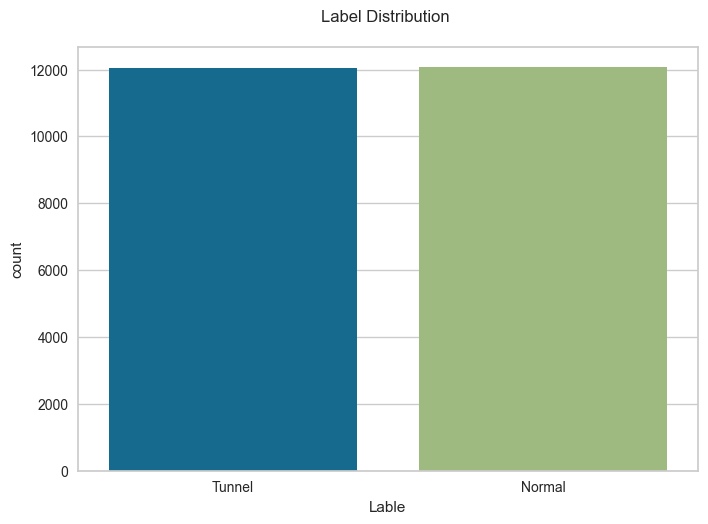

In [57]:
sns.countplot(x="Lable",data=df2)
plt.title("Label Distribution \n ")
plt.savefig("image.png")
plt.show()

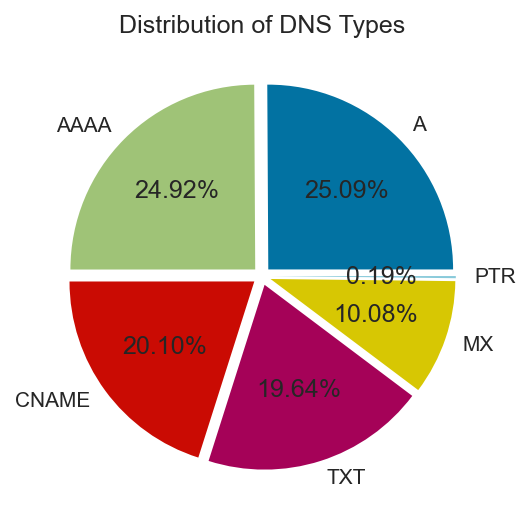

In [58]:
plt.figure(figsize=(4,4),dpi=150)
x=df2.DNS_type.value_counts()
plt.pie(x,labels=x.index,autopct="%.2f%%",explode=(.05,.05,.05,.05,.05,.05))
plt.title("Distribution of DNS Types")
plt.savefig("image1.png")
plt.show()

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import math

In [60]:
def calculate_entropy(text):
    if not text: 
        return 0 
    entropy = 0
    for x in range(256): 
        p_x = float(text.count(chr(x)))/len(text) 
        if p_x > 0: 
            entropy += - p_x*math.log(p_x, 2) 
    return entropy

In [61]:
# run entropy function on the train dataset and add Entropy column
entropy_train_vals = []

for query in df2['DNS_info']:
    entropy = calculate_entropy(query)
    entropy_train_vals.append(entropy)
    
df2['Entropy'] = entropy_train_vals

In [62]:
df2.shape

(24124, 10)

In [63]:
df2=df2.drop(["Timestamp","Protocol","Source_IP","Destination_IP", "Identification_no"],axis=1)

In [64]:
df2.duplicated().sum()

1004

In [65]:
df2.drop_duplicates(inplace=True)

In [66]:
df2.shape

(23120, 5)

In [67]:
profile = ProfileReport(df2, title="Profiling Report")

In [68]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [70]:
clf = setup(df2, target = 'Lable', session_id = 123,index=False)

,Description,Value
0,Session id,123
1,Target,Lable
2,Target type,Binary
3,Target mapping,"Normal: 0, Tunnel: 1"
4,Original data shape,"(28560, 5)"
5,Transformed data shape,"(28560, 10)"
6,Transformed train set shape,"(19992, 10)"
7,Transformed test set shape,"(8568, 10)"
8,Numeric features,2
9,Categorical features,2


In [71]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7397,0.7014,0.7633,0.7406,0.7517,0.4784,0.4787,1.1910
qda,Quadratic Discriminant Analysis,0.7093,0.6731,0.6880,0.7320,0.7067,0.4194,0.4221,1.2580
lr,Logistic Regression,0.6903,0.5485,0.7015,0.6996,0.7005,0.3799,0.3800,1.6580
svm,SVM - Linear Kernel,0.6545,0.0000,0.7549,0.6446,0.6872,0.3042,0.3206,1.3480
gbc,Gradient Boosting Classifier,0.5774,0.3577,0.7334,0.5706,0.6418,0.1458,0.1527,1.5990
dummy,Dummy Classifier,0.5163,0.5000,1.0000,0.5163,0.6810,0.0000,0.0000,1.3320
lightgbm,Light Gradient Boosting Machine,0.5016,0.3376,0.5959,0.4923,0.5365,-0.0017,-0.0032,1.6950
xgboost,Extreme Gradient Boosting,0.4933,0.3345,0.5803,0.4842,0.5254,-0.0179,-0.0190,1.6660
et,Extra Trees Classifier,0.4928,0.3249,0.7111,0.5053,0.5905,-0.0292,-0.0306,1.6940
knn,K Neighbors Classifier,0.4617,0.4283,0.4059,0.4748,0.4376,-0.0724,-0.0733,1.3140


In [72]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [73]:
# check the final params of best model
best.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [74]:
best.feature_names_in_

array(['DNS_type_TXT', 'DNS_type_AAAA', 'DNS_type_A', 'DNS_type_CNAME',
       'DNS_type_MX', 'DNS_type_PTR', 'DNS_info', 'DNS_Response_Len',
       'Entropy'], dtype=object)

In [75]:
# save model
save_model(best, 'best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\MANOJG~1\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['DNS_Response_Len', 'Entropy'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=...
                                                               verbose=0))),
                 ('rest_encoding',
                  TransformerWrapper(exclude=None, include=['DNS_info'],
                                     transformer=TargetEncoder(cols=['DNS_info'],
                                                        

In [76]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7440,0.7012,0.7628,0.7468,0.7547,0.4872,0.4873


In [77]:
#Load the pipeline from the .pkl file
loaded_pipeline = joblib.load('best_pipeline.pkl')

In [81]:
#Take input from the user
user_input = input("Enter DNS_type, DNS_info, DNS_Response_Len separated by commas: ")
user_data = user_input.split(',')

Enter DNS_type, DNS_info, DNS_Response_Len separated by commas:  AAAA,all.tliveuptrans.sched.ovscdns.net.,52


In [82]:
# Prepare user input as a DataFrame
user_df = pd.DataFrame({
    'DNS_type': [user_data[0].strip()],
    'DNS_info': [user_data[1].strip()],
    'DNS_Response_Len': [float(user_data[2].strip())],
    'Entropy': calculate_entropy('DNS_info')
})

In [83]:
# Make predictions using the loaded pipeline
prediction = loaded_pipeline.predict(user_df)
print("Predicted class:", prediction[0])

Predicted class: Normal
